## Nonlinear pulse propagation

From Hamerly's paper.

In [1]:
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from matplotlib import cm

#The following hack is for importing a module from the "Modules" folder
import os
cwd = os.getcwd()
os.chdir('..')
from Modules.analysis import FTX, IFTX
os.chdir(cwd)

In [2]:
# %load_ext autoreload

In [3]:
# %autoreload 2

In [4]:
# %matplotlib notebook

In [5]:
#Change size of plots
plt.rcParams['figure.figsize'] = [20, 5]

## Units
We'll work in the following units:

time = ps <br>
frequency = THz (1/time) <br>
distance = mm

In [6]:
from scipy.constants import pi, c
c = c*1e-9; #mm/ps, [Freq]=THz

## Single Pass

In [7]:
def single_pass(a,b,Da,Db,epsilon,L,h,plot=False):
    zi = 0
    
    Da_h = Da**(h/2)
    Db_h = Db**(h/2)
    
    if plot==True:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.ion()
        fig.canvas.draw()
        
    while zi<L:
        #Linear half step (front)
        A = np.fft.fft(a)
        A = A*Da_h
        a = np.fft.ifft(A)
        B = np.fft.fft(b)
        B = B*Db_h
        b = np.fft.ifft(B)
        
        #Nonlinear step
        #Runge-Kutta for a
        k1 = h/2*epsilon*b*np.conj(a)
        k2 = h/2*epsilon*b*np.conj(a+k1/2)
        k3 = h/2*epsilon*b*np.conj(a+k2/2)
        k4 = h/2*epsilon*b*np.conj(a+k3)
        a = a + (1/6)*(k1+2*k2+2*k3+k4)

        #Integral for b
        b = b - 0.5*h*epsilon*a*a
        
        #Runge-Kutta for a
        k1 = h/2*epsilon*b*np.conj(a)
        k2 = h/2*epsilon*b*np.conj(a+k1/2)
        k3 = h/2*epsilon*b*np.conj(a+k2/2)
        k4 = h/2*epsilon*b*np.conj(a+k3)
        a = a + (1/6)*(k1+2*k2+2*k3+k4)
        
        #Linear half step (back)
        A = np.fft.fft(a)
        A = A*Da_h
        a = np.fft.ifft(A)
        B = np.fft.fft(b)
        B = B*Db_h
        b = np.fft.ifft(B)
        
        #Next z
        zi = zi+h

        if plot==True and zi%2<0.1:
            ax.clear()
            ax.plot(t, abs(a), t, abs(b));
            ax.axes.set_ylim(0,2000)
            fig.canvas.draw()
            time.sleep(0.001)

    return a,b

In [8]:
def single_pass1(a,b,Da,Db,epsilon,L,h,plot=False):
    zi = 0
    
    Da_h = Da**(h/2)
    Db_h = Db**(h/2)
    
    if plot==True:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.ion()
        fig.canvas.draw()
        
    while zi<L:
        #Linear half step (front)
        A = np.fft.fft(a)
        A = A*Da_h
        a = np.fft.ifft(A)
        B = np.fft.fft(b)
        B = B*Db_h
        b = np.fft.ifft(B)
        
        #Nonlinear step
        #Runge-Kutta for a
        k1 = h/2*epsilon*b*np.conj(a)
        k2 = h/2*epsilon*b*np.conj(a+k1/2)
        k3 = h/2*epsilon*b*np.conj(a+k2/2)
        k4 = h/2*epsilon*b*np.conj(a+k3)
        a = a + (1/6)*(k1+2*k2+2*k3+k4)

        #Integral for b
#         b = b - 0.5*h*epsilon*a*a
        
        #Runge-Kutta for a
        k1 = h/2*epsilon*b*np.conj(a)
        k2 = h/2*epsilon*b*np.conj(a+k1/2)
        k3 = h/2*epsilon*b*np.conj(a+k2/2)
        k4 = h/2*epsilon*b*np.conj(a+k3)
        a = a + (1/6)*(k1+2*k2+2*k3+k4)
        
        #Linear half step (back)
        A = np.fft.fft(a)
        A = A*Da_h
        a = np.fft.ifft(A)
        B = np.fft.fft(b)
        B = B*Db_h
        b = np.fft.ifft(B)
        
        #Next z
        zi = zi+h

        if plot==True and zi%2<0.1:
            ax.clear()
            ax.plot(t, abs(a), t, abs(b));
            ax.axes.set_ylim(0,2000)
            fig.canvas.draw()
            time.sleep(0.001)

    return a,b

In [9]:
def single_pass2(a,b,Da,Db,epsilon,L,h,plot=False):
    zi = 0
    
    Da_h = Da**(h/2)
    Db_h = Db**(h/2)
    
    if plot==True:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.ion()
        fig.canvas.draw()
        
    while zi<L:
        #Linear half step (front)
        A = np.fft.fft(a)
        A = A*Da_h
        a = np.fft.ifft(A)
        B = np.fft.fft(b)
        B = B*Db_h
        b = np.fft.ifft(B)
        
        #Nonlinear step
        #Runge-Kutta for a
#         k1 = h/2*epsilon*b*np.conj(a)
#         k2 = h/2*epsilon*b*np.conj(a+k1/2)
#         k3 = h/2*epsilon*b*np.conj(a+k2/2)
#         k4 = h/2*epsilon*b*np.conj(a+k3)
#         a = a + (1/6)*(k1+2*k2+2*k3+k4)

        #Integral for b
        b = b - 0.5*h*epsilon*a*a
        
        #Runge-Kutta for a
#         k1 = h/2*epsilon*b*np.conj(a)
#         k2 = h/2*epsilon*b*np.conj(a+k1/2)
#         k3 = h/2*epsilon*b*np.conj(a+k2/2)
#         k4 = h/2*epsilon*b*np.conj(a+k3)
#         a = a + (1/6)*(k1+2*k2+2*k3+k4)
        
        #Linear half step (back)
        A = np.fft.fft(a)
        A = A*Da_h
        a = np.fft.ifft(A)
        B = np.fft.fft(b)
        B = B*Db_h
        b = np.fft.ifft(B)
        
        #Next z
        zi = zi+h

        if plot==True and zi%2<0.1:
            ax.clear()
            ax.plot(t, abs(a), t, abs(b));
            ax.axes.set_ylim(0,2000)
            fig.canvas.draw()
            time.sleep(0.001)

    return a,b

## OPO

In [10]:
def opo(wla=1.5, L=40, alpha = 0.00691,  u = 0.329, Tp = 13.2, b2a = 1.12e-4, 
        b3a = 3.09e-5, b2b = 4.06e-4, b3b = 2.51e-5, epsilon = 5.16e-5,
       G0 = 3.33, b0 = 3.84e2, p = 1.0, phi0=0, l=0, h=0.1, plot=False):
    
    #Initialize signal as random
    a = np.random.normal(0,1e-3,1024) + 1j*np.random.normal(0,1e-3,1024)
    a_prev = a

    #Linear operators
    Da = np.exp(-alpha/2 + 1j*b2a*Omega**2/2 - 1j*b3a*Omega**3/6)
    Db = np.exp(-alpha/2 - 1j*u*Omega + 1j*b2b*Omega**2/2 - 1j*b3b*Omega**3/6)
    
    #Feedback response
#     phi = phi0 + (phi0/pi)*(wla*1e-3)/(2*c)*Omega
    phi2 = 25
    phi3 = 76
    phi4 = -13020
    phi5 = 983328
    deltaphi = (phi2/2)*Omega**2 + (phi3/6)*Omega**3 #+ (phi4/24)*Omega**4 + (phi5/120)*Omega**5
    phi = phi0 + pi*l + l*(wla*1e-3)/(2*c)*Omega + deltaphi
    fb = np.sqrt(1/G0)*np.exp(-1j*phi)
    
    N = 500 #Max number of loops

    #Initialize convergence testing vector
    Vdiff = np.zeros((N,1))
    
    if plot==True:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.ion()
        fig.canvas.draw()
    
    for kn in range(N):
        b = b0*p*b_shape
        a,b = single_pass(a,b,Da,Db,epsilon,L,h)

        #Power calc
        Pa = scipy.integrate.simps(np.abs(a)**2,t)
        Pa_prev = scipy.integrate.simps(np.abs(a_prev)**2,t)
#         Check if steady state at output of section
#         Pdiff = scipy.integrate.simps((np.abs(a_prev - a)**2),t)
#         diff = Pdiff/Pa*100
        diff = np.abs(Pa_prev - Pa)/Pa*100
        Vdiff[kn] = diff
        
        a_prev = a
        if diff<1e-6:
            break
            
        #Apply feedback
#         a = a*window
        A = np.fft.fft(a)
        A = A*fb
        a = np.fft.ifft(A)
        
        if plot==True and kn%2==0:
            ax.clear()
            ax.plot(t, abs(a), t, abs(b));
            ax.axes.set_ylim(0,2000)
            ax.text(40,1400,'N=' + str(kn))
            ax.text(40,1200,'Pa=' + str(round(Pa*1e-8,3)))
            ax.text(40,1000,'diff=' + str(round(diff,6)))
            fig.canvas.draw()
            time.sleep(0.001)
        
    return a, Pa

# Tests

## Input parameters

In [11]:
#Input parameters
wla = 1.5 #um
wlb = wla/2 #um
L = 40 #mm
alpha = 0.00691 #1/mm
u = 0.329 #ps/mm
Tp = 13.2 #ps
b2a = 1.12e-4 #ps^2/mm
b3a = 3.09e-5 #ps^3/mm
b2b = 4.06e-4
b3b = 2.51e-5
epsilon = 5.16e-5 #ps^0.5/mm
G0 = 3.33
b0 = 3.84e2 #ps^0.5

p = 1.1 #normalized power
l = 0 #detuning

phi0 = pi*l

## Time and Frequency domain windows

In [12]:
#Simulation window setup
N = 1024 #Fourier size

#Let's base the window size on the pump duration
xtra = 5
t = np.linspace(-xtra*Tp, xtra*Tp, N)
ts = t[1]-t[0] #Sampling period
print('Sampling Rate =',ts, 'ps')
window = np.hamming(N)

#Frequency domain
Omega = 2*pi*np.fft.fftfreq(t.size, ts) #Angular frequencies
print('Freq max =', np.amax(Omega), 'THz')

Sampling Rate = 0.12903225806451246 ps
Freq max = 24.299789660897133 THz


## Single Pass Tests

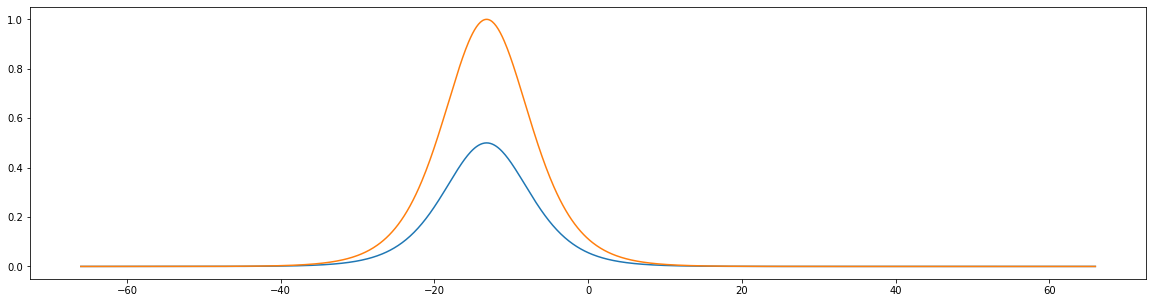

In [13]:
#Pulse shape
t0 = -Tp
tau = Tp/1.76
b_shape = 1/np.cosh((t-t0)/tau)**2

#Dispersionless
Da = 1
Db = 1

a_in = 0.5*b_shape
b_in = b_shape

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,a_in,t,b_in);

## Constant b

C:\Users\luish\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


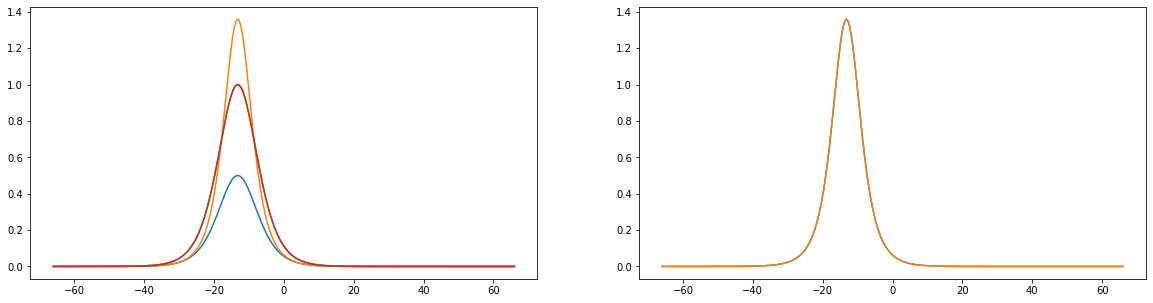

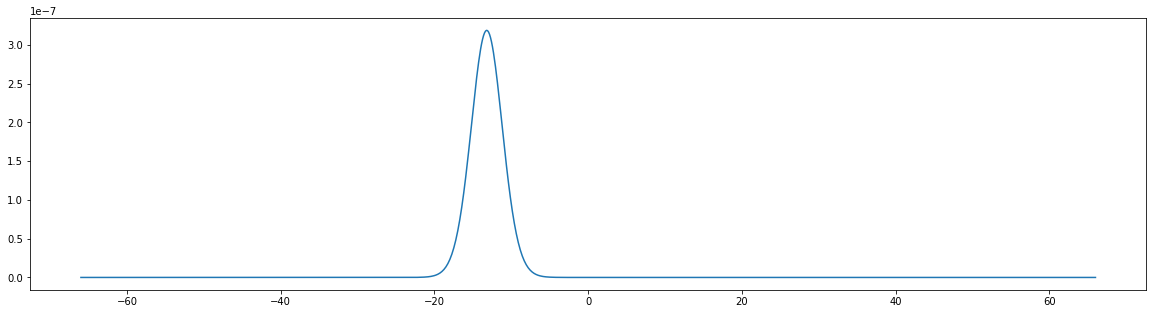

In [14]:
h = 0.5
eps = 0.1
L = 10
a_out,b_out = single_pass1(a_in,b_in,Da,Db,epsilon=eps,L=L,h=h,plot=False)
a_out_theory = a_in*np.exp(eps*L*b_in)
error = np.abs(a_out_theory - a_out)/np.amax(a_out_theory)*100

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(t,a_in, t, a_out,t,b_in,t,b_out);
ax2.plot(t,a_out_theory,t,a_out);

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(t,error);

## Constant a

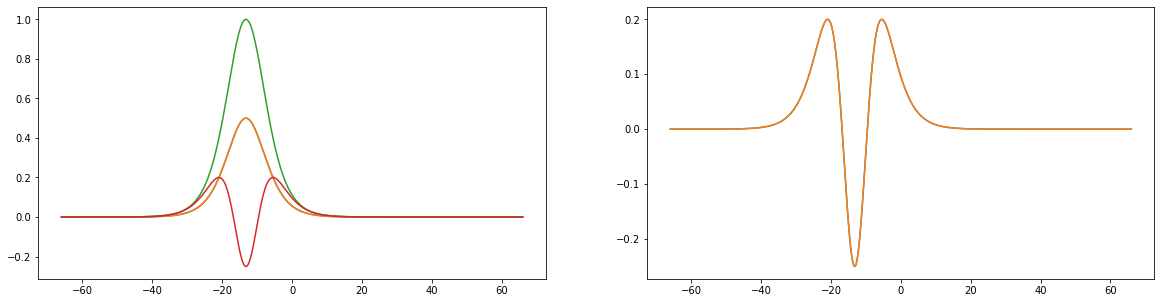

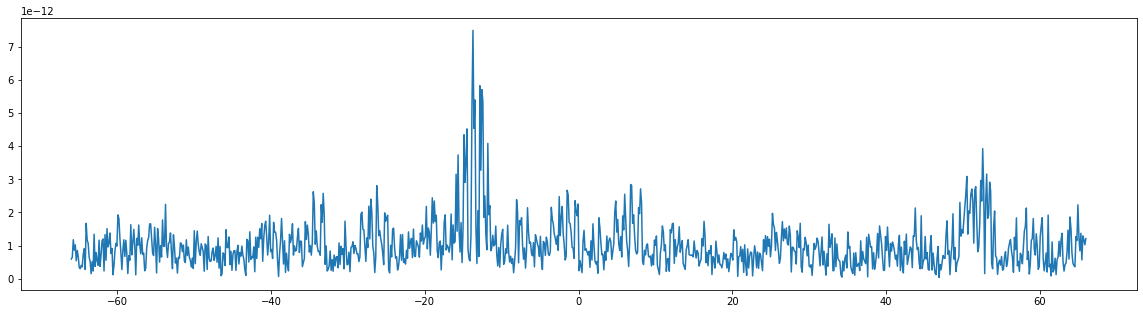

In [15]:
h = 0.5
eps = 0.2
L = 50

a_out,b_out = single_pass2(a_in,b_in,Da,Db,epsilon=eps,L=L,h=h,plot=False)
b_out_theory = b_in - 0.5*eps*L*a_in**2
error = np.abs(b_out_theory - b_out)/np.amax(np.abs(b_out_theory))*100

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(t,a_in, t, a_out,t,b_in,t,b_out);
ax2.plot(t,b_out_theory,t,b_out);


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(t,error);

## Both (Simulton - without dispersion)

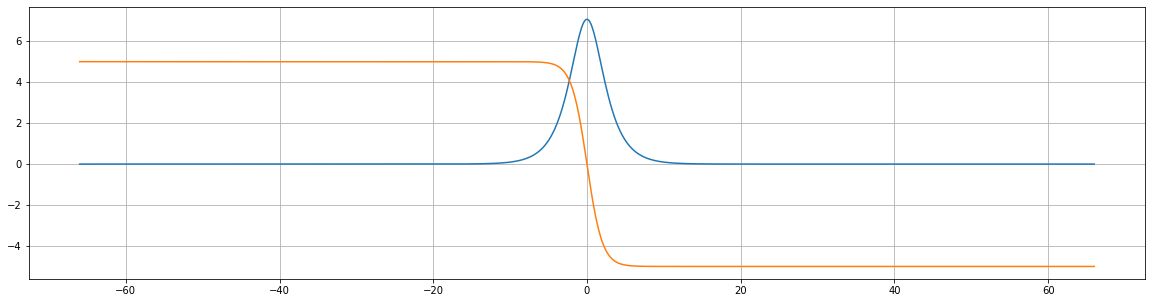

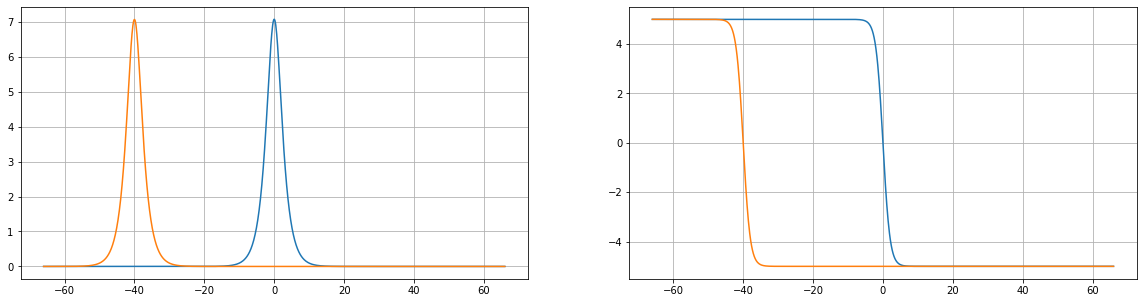

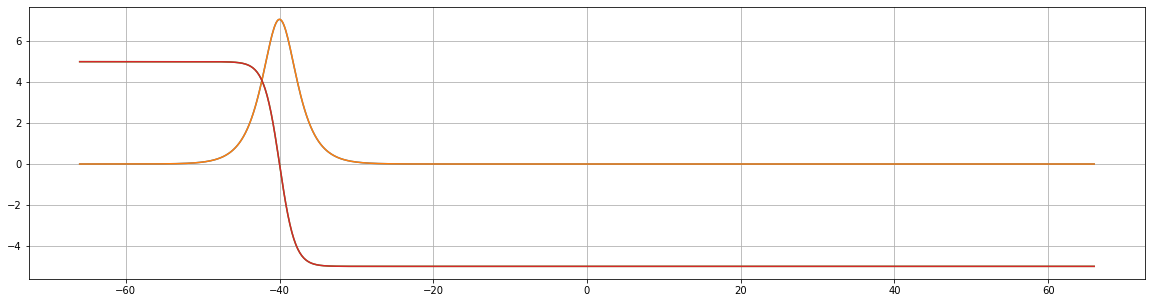

In [17]:
h = 0.1
eps = 0.2
L = 20

#Pulses shapes
t0 = 0
tau = 2
a_in = np.sqrt(2)/(eps*np.cosh((t-t0)/tau))
b_in = (-1/eps)*np.tanh((t-t0)/tau)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(t,a_in,t,b_in);
plt.grid('on')

Da = 1
Db = 1
a_out,b_out = single_pass(a_in,b_in,Da,Db,epsilon=eps,L=L,h=h,plot=False)

a_out_theory = np.sqrt(2)/(eps*np.cosh((t-t0)/tau + L))
b_out_theory = (-1/eps)*np.tanh((t-t0)/tau + L)

fig = plt.figure()
ax1 = fig.add_subplot(121); plt.grid('on')
ax2 = fig.add_subplot(122); plt.grid('on')
ax1.plot(t, a_in, t, a_out);
ax2.plot(t, b_in, t, b_out); 

fig = plt.figure()
ax1 = fig.add_subplot(111); plt.grid('on')
ax1.plot(t,a_out,t,a_out_theory,t,b_out,t,b_out_theory);